In [1]:
import scirpy as ir
import scanpy as sc
from glob import glob
import pandas as pd
import tarfile
import anndata
import warnings

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, cm as mpl_cm
from cycler import cycler

sc.set_figure_params(figsize=(4, 4))
sc.settings.verbosity = 2  # verbosity: errors (0), warnings (1), info (2), hints (3)

In [2]:
adata = sc.read_10x_mtx('C:/Users/mahim/Desktop/HiWi/Geneexpr_Matrix_Skin_P2/')
adata_tcr = ir.io.read_10x_vdj('C:/Users/mahim/Desktop/HiWi/VDJ_Skin_P2/all_contig_annotations.json')


In [3]:
ir.pp.merge_with_ir(adata, adata_tcr)

... storing 'feature_types' as categorical


computing PCA
    with n_comps=50
    finished (0:00:04)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:15)
computing UMAP
    finished (0:00:06)


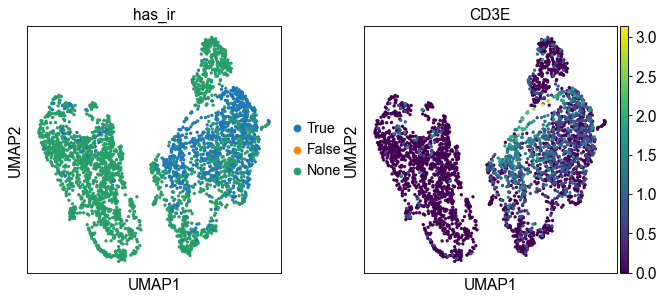

In [4]:
#Now, we can use TCR-related variables together with the gene expression data. 
#Here, we visualize the cells with a detected TCR on the UMAP plot. 
#It is reassuring that the TCRs coincide with the T-cell marker gene CD3.
sc.pp.log1p(adata)
sc.pp.pca(adata, svd_solver="arpack")
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color=["has_ir", "CD3E"])

In [5]:
sc.logging.print_header()

scanpy==1.7.2 anndata==0.7.6 umap==0.5.1 numpy==1.20.2 scipy==1.6.2 pandas==1.2.4 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.9.1


In [6]:
#preprocessing the transcriptomics data
sc.pp.filter_genes(adata, min_cells=10)
sc.pp.filter_cells(adata, min_genes=100)

filtered out 20106 genes that are detected in less than 10 cells
filtered out 3 cells that have less than 100 genes expressed


In [7]:
#normalizing transcriptomics data
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1000)
sc.pp.log1p(adata)

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [8]:
#TCR quality control
ir.tl.chain_qc(adata)

In [36]:
adata.obs['source'] = 'Skin'
adata.obs

,multi_chain,extra_chains,is_cell,high_confidence,IR_VJ_1_c_call,IR_VJ_2_c_call,IR_VDJ_1_c_call,IR_VDJ_2_c_call,IR_VJ_1_consensus_count,IR_VJ_2_consensus_count,...,n_counts,receptor_type,receptor_subtype,chain_pairing,source,clone_id,clone_id_size,cc_aa_alignment,cc_aa_alignment_size,clonal_expansion
AAACCTGAGAGCAATT-1,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,1334.127930,no IR,no IR,no IR,Skin,NaN,NaN,NaN,NaN,nan
AAACCTGCATCGATTG-1,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,1815.363770,no IR,no IR,no IR,Skin,NaN,NaN,NaN,NaN,nan
AAACCTGGTTAAGTAG-1,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,826.240112,no IR,no IR,no IR,Skin,NaN,NaN,NaN,NaN,nan
AAACCTGTCAGTTGAC-1,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,487.910431,no IR,no IR,no IR,Skin,NaN,NaN,NaN,NaN,nan
AAACCTGTCCGCGCAA-1,False,"[{""c_call"": ""TRBC2"", ""consensus_count"": 15424,...",True,True,TRAC,NaN,TRBC1,NaN,4116.0,NaN,...,1770.509277,TCR,TRA+TRB,single pair,Skin,0,1.0,0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGGTGATAT-1,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,752.423584,no IR,no IR,no IR,Skin,NaN,NaN,NaN,NaN,nan
TTTGTCACAGATCGGA-1,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,1572.654907,no IR,no IR,no IR,Skin,NaN,NaN,NaN,NaN,nan
TTTGTCACAGTCGTGC-1,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,551.459656,no IR,no IR,no IR,Skin,NaN,NaN,NaN,NaN,nan
TTTGTCAGTCCTGCTT-1,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,1950.377197,no IR,no IR,no IR,Skin,NaN,NaN,NaN,NaN,nan


... storing 'receptor_type' as categorical
... storing 'receptor_subtype' as categorical
... storing 'chain_pairing' as categorical
... storing 'source' as categorical


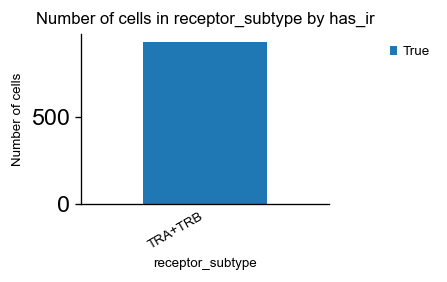

In [11]:
#this is more precise in the table above
#receptor_subtype mulitchain is absent here
ax = ir.pl.group_abundance(adata, groupby="receptor_subtype", target_col="has_ir")

In [12]:
#Define clonotypes and clonotype clusters#


In [13]:
#scirpy.pp.ir_dist() computes distances between CDR3 nucleotide (nt) or amino acid (aa) sequences, either based on sequence identity or similarity.
#It creates two distance matrices: one for all unique VJ sequences and one for all unique VDJ sequences.
#The distance matrices are added to adata.uns

In [14]:
#The function scirpy.tl.define_clonotypes() matches cells based on the distances of their VJ and VDJ CDR3-sequences and value of the function parameters dual_ir and receptor_arms.
#Finally, it detects connected modules in the graph and annotates them as clonotypes.
#This will add a clone_id and clone_id_size column to adata.obs

In [15]:
# using default parameters, `ir_dist` will compute nucleotide sequence identity
ir.pp.ir_dist(adata)
ir.tl.define_clonotypes(adata, receptor_arms="all", dual_ir="any")

Computing sequence x sequence distance matrix for VJ sequences.
Computing sequence x sequence distance matrix for VDJ sequences.
Initializing lookup tables. 
Computing clonotype x clonotype distances.


  0%|          | 0/512 [00:00<?, ?it/s]

Stored clonal assignments in `adata.obs["clone_id"]`.


In [16]:
#To visualize the network we first call scirpy.tl.clonotype_network() to compute the layout
ir.tl.clonotype_network(adata, min_cells=2)

In [17]:
#The resulting plot is a network, where each dot represents cells with identical receptor configurations.
#As we define clonotypes as cells with identical CDR3-sequences, each dot is also a clonotype.
#For each clonotype, the numeric clonotype id is shown in the graph.
#The size of each dot refers to the number of cells with the same receptor configurations.

... storing 'clone_id' as categorical


<AxesSubplot:>

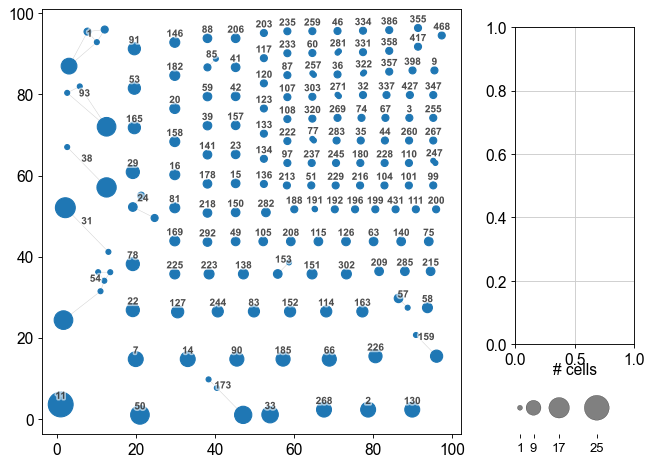

In [18]:
ir.pl.clonotype_network(
    adata, base_size=20, label_fontsize=9, panel_size=(7, 7)
)

In [19]:
#Re-compute CDR3 neighborhood graph and define clonotype clusters
#We can now re-compute the clonotype network based on amino-acid sequence similarity and define clonotype clusters

In [20]:
ir.pp.ir_dist(
    adata,
    metric="alignment",
    sequence="aa",
    cutoff=15,
)

Computing sequence x sequence distance matrix for VJ sequences.


  0%|          | 0/28 [00:00<?, ?it/s]

Computing sequence x sequence distance matrix for VDJ sequences.


  0%|          | 0/36 [00:00<?, ?it/s]

In [21]:
ir.tl.define_clonotype_clusters(
    adata, sequence="aa", metric="alignment", receptor_arms="all", dual_ir="any"
)

Initializing lookup tables. 
Computing clonotype x clonotype distances.


  0%|          | 0/512 [00:00<?, ?it/s]

Stored clonal assignments in `adata.obs["cc_aa_alignment"]`.


In [22]:
ir.tl.clonotype_network(adata, min_cells=3, sequence="aa", metric="alignment")

In [23]:
#Compared to the previous plot, we observere several connected dots.
#Each fully connected subnetwork represents a “clonotype cluster”, each dot still represents cells with identical receptor configurations

... storing 'cc_aa_alignment' as categorical


<AxesSubplot:>

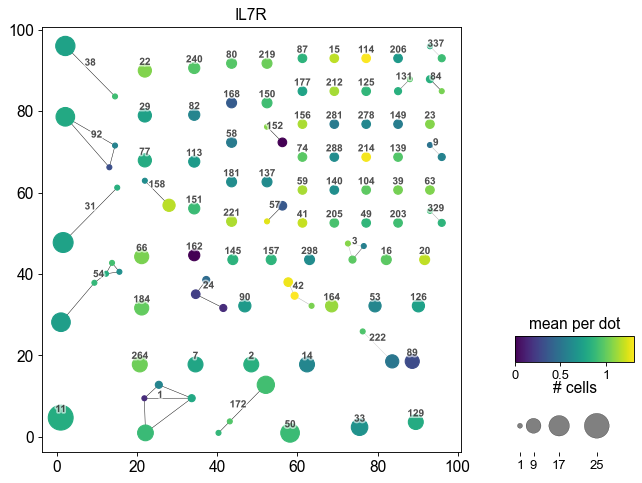

In [24]:
#CD4
ir.pl.clonotype_network(
    adata, color="IL7R", label_fontsize=9, panel_size=(7, 7), base_size=20
)

<AxesSubplot:>

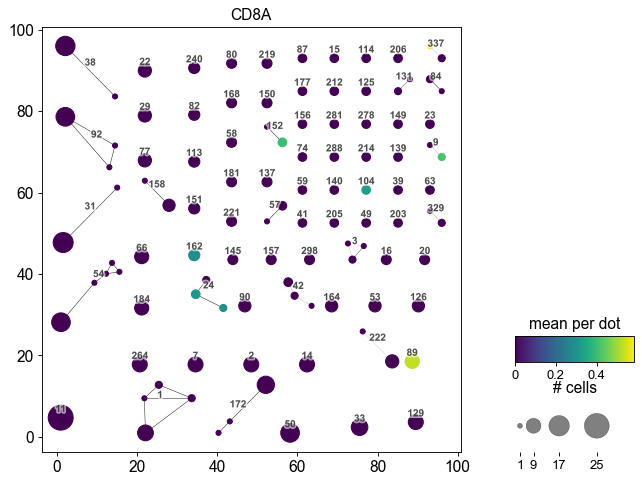

In [25]:
#CD8A
ir.pl.clonotype_network(
    adata, color="CD8A", label_fontsize=9, panel_size=(7, 7), base_size=20
)

In [26]:
ir.tl.clonal_expansion(adata)

In [27]:
#clonal_expansion refers to expansion categories, i.e singleton clonotypes, clonotypes with 2 cells and more than 2 cells.
#The clonotype_size refers to the absolute number of cells in a clonotype

... storing 'clonal_expansion' as categorical


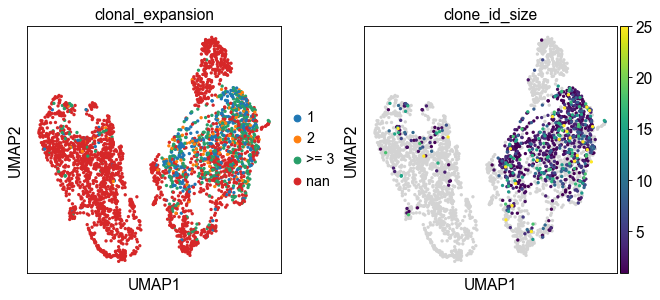

In [28]:
sc.pl.umap(adata, color=["clonal_expansion", "clone_id_size"])

In [29]:
#The second option is to show the number of cells belonging to an expanded clonotype per category in a stacked bar plot, using the scirpy.pl.clonal_expansion() plotting function

<AxesSubplot:title={'center':'Number of cells in clone_id by receptor_type'}, xlabel='clone_id', ylabel='Number of cells'>

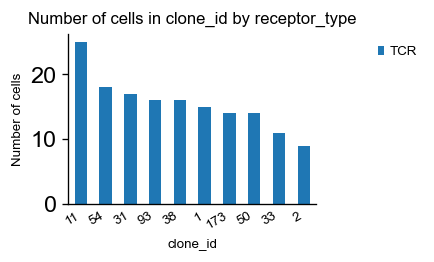

In [30]:
#skyscraper
ir.pl.group_abundance(adata, groupby="clone_id", target_col="receptor_type", max_cols=10)

In [34]:
adata.obs["clone_id"]

AAACCTGAGAGCAATT-1    NaN
AAACCTGCATCGATTG-1    NaN
AAACCTGGTTAAGTAG-1    NaN
AAACCTGTCAGTTGAC-1    NaN
AAACCTGTCCGCGCAA-1      0
                     ... 
TTTGTCAAGGTGATAT-1    NaN
TTTGTCACAGATCGGA-1    NaN
TTTGTCACAGTCGTGC-1    NaN
TTTGTCAGTCCTGCTT-1    NaN
TTTGTCAGTTTGTGTG-1    NaN
Name: clone_id, Length: 3322, dtype: category
Categories (486, object): ['0', '1', '2', '3', ..., '482', '483', '484', '485']

In [35]:
adata.obs

,multi_chain,extra_chains,is_cell,high_confidence,IR_VJ_1_c_call,IR_VJ_2_c_call,IR_VDJ_1_c_call,IR_VDJ_2_c_call,IR_VJ_1_consensus_count,IR_VJ_2_consensus_count,...,n_counts,receptor_type,receptor_subtype,chain_pairing,source,clone_id,clone_id_size,cc_aa_alignment,cc_aa_alignment_size,clonal_expansion
AAACCTGAGAGCAATT-1,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,1334.127930,no IR,no IR,no IR,Skin,NaN,NaN,NaN,NaN,nan
AAACCTGCATCGATTG-1,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,1815.363770,no IR,no IR,no IR,Skin,NaN,NaN,NaN,NaN,nan
AAACCTGGTTAAGTAG-1,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,826.240112,no IR,no IR,no IR,Skin,NaN,NaN,NaN,NaN,nan
AAACCTGTCAGTTGAC-1,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,487.910431,no IR,no IR,no IR,Skin,NaN,NaN,NaN,NaN,nan
AAACCTGTCCGCGCAA-1,False,"[{""c_call"": ""TRBC2"", ""consensus_count"": 15424,...",True,True,TRAC,NaN,TRBC1,NaN,4116.0,NaN,...,1770.509277,TCR,TRA+TRB,single pair,Skin,0,1.0,0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGGTGATAT-1,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,752.423584,no IR,no IR,no IR,Skin,NaN,NaN,NaN,NaN,nan
TTTGTCACAGATCGGA-1,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,1572.654907,no IR,no IR,no IR,Skin,NaN,NaN,NaN,NaN,nan
TTTGTCACAGTCGTGC-1,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,551.459656,no IR,no IR,no IR,Skin,NaN,NaN,NaN,NaN,nan
TTTGTCAGTCCTGCTT-1,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,1950.377197,no IR,no IR,no IR,Skin,NaN,NaN,NaN,NaN,nan


In [1]:
adata.shape

NameError: name 'adata' is not defined